<a href="https://colab.research.google.com/github/jlgrons/JSC270_Lecture4/blob/main/Palmer_Penguins_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check out this [GitHub repo](https://github.com/mcnakhaee/palmerpenguins) for more info on the data.

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import numpy as np
import matplotlib.pyplot as plt
sns.set()
sns.set_style('whitegrid')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
penguins = sns.load_dataset("penguins")

### (Very quick) EDA

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins.shape

(344, 7)

In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# nice function to summarize missing data from: https://michael-fuchs-python.netlify.app/2019/03/18/dealing-with-missing-values/
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(penguins)


Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
bill_length_mm,2,0.6
bill_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [ ]:
missing_subset = penguins[penguins.isnull().any(axis =1)]
missing_subset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [ ]:
missing_subset.shape

(11, 7)

In [ ]:
# We won't look at the sex variable for our analysis, so since only 2 observations have missing values for the other variables we'll move forward with the complete cases
# 'Complete case analysis' is a way to say your restricting your focus to those observations with no missing data
# If I were interested in sex, my next step would be to do a search of the documentation, discussion boards etc, for this dataset

In [ ]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

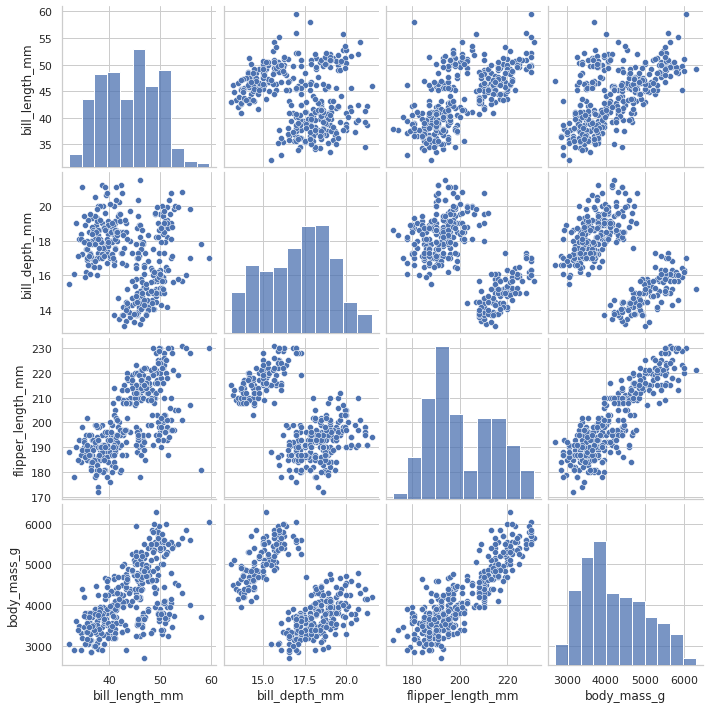

In [ ]:
# this dataset is actually the example for the pairplot documentation: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(penguins)
plt.show()

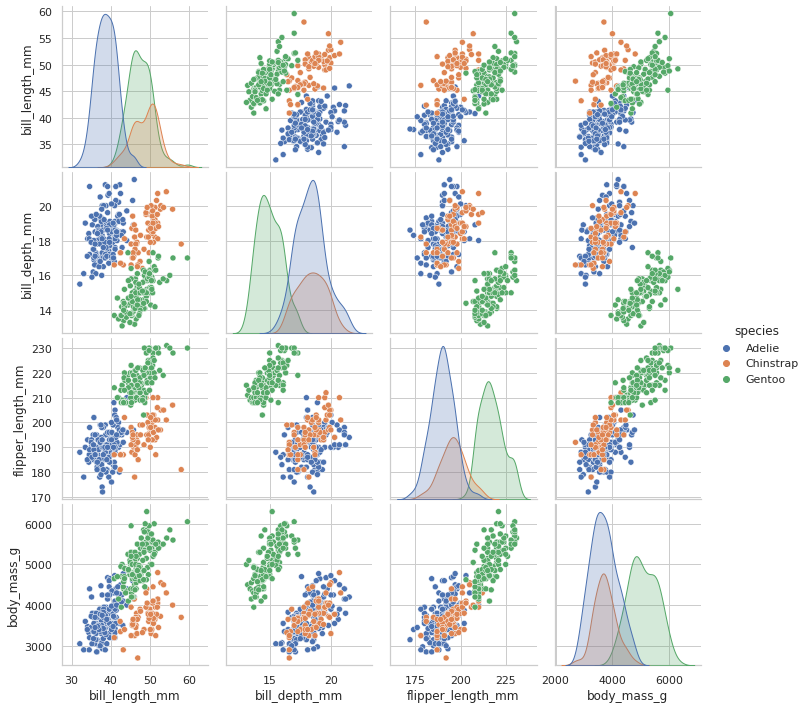

In [ ]:
# this dataset is actually the example for the pairplot documentation: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(penguins, hue = 'species')
plt.show()

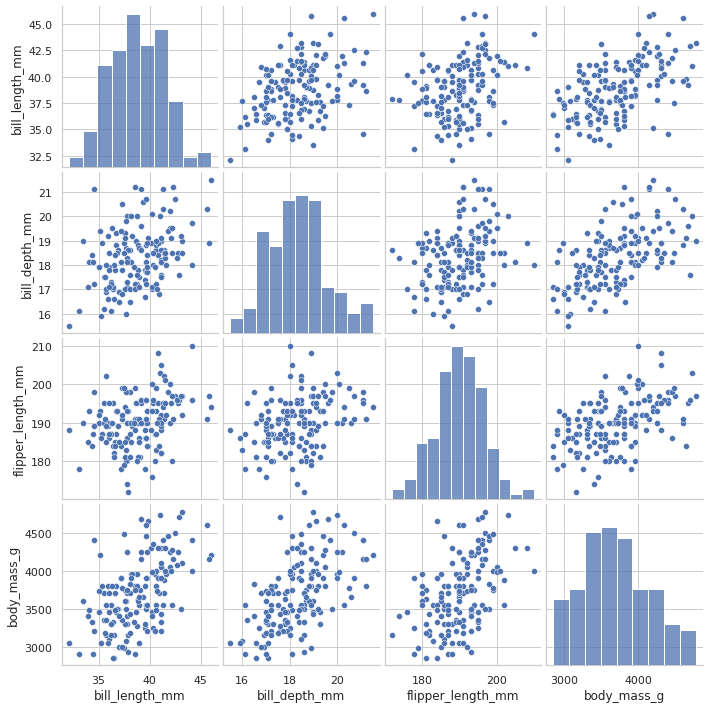

In [ ]:
sns.pairplot(penguins[penguins.species == 'Adelie'], corner = False)
plt.show()

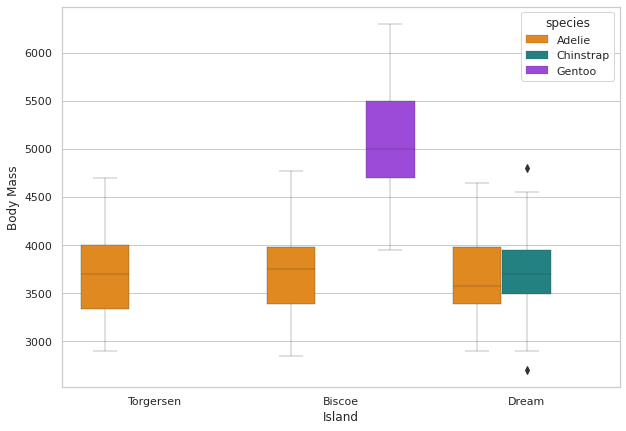

In [ ]:
# for your plotting knowledge, another graphic
plt.figure(figsize = [10,7])
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = penguins,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')
plt.show()

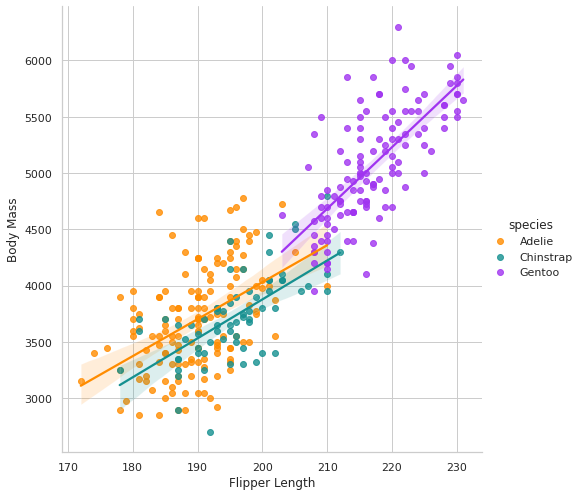

In [ ]:
# for your plotting knowledge, another graphic
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=penguins,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')

### Regression Modeling

In [ ]:
# There seems to be a lot of variation across species, lets focus on adelie for our example
# As mentioned above we'll drop the rows with missing values 
adelie = penguins[penguins.species == 'Adelie'].dropna(how = 'any')

In [ ]:
adelie.shape

(146, 7)

In [ ]:
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


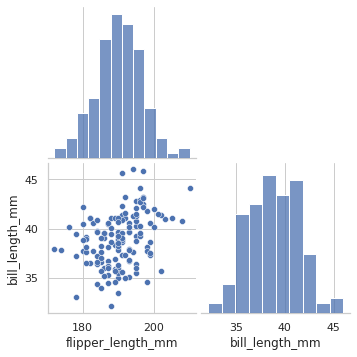

In [ ]:
sns.pairplot(adelie[['flipper_length_mm', 'bill_length_mm']], corner = True)
plt.show()

In [ ]:
reg1 = smf.ols('bill_length_mm ~ flipper_length_mm', data = adelie).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         bill_length_mm   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     17.87
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.18e-05
Time:                        20:01:30   Log-Likelihood:                -341.10
No. Observations:                 146   AIC:                             686.2
Df Residuals:                     144   BIC:                             692.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.0358      6.10

In [ ]:
adelie.flipper_length_mm.mean()

190.1027397260274

In [ ]:
# the condition number warning is a little strange here
# if you center the covariate note that it is removed and the interpretation of the intercept is improved
# note the slope and R2 do not change!
adelie["flipper_length_mm_centered"] = adelie["flipper_length_mm"] - adelie["flipper_length_mm"].mean()
reg1_centered = smf.ols('bill_length_mm ~ flipper_length_mm_centered', data = adelie).fit()
print(reg1_centered.summary())

                            OLS Regression Results                            
Dep. Variable:         bill_length_mm   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     17.87
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.18e-05
Time:                        20:01:30   Log-Likelihood:                -341.10
No. Observations:                 146   AIC:                             686.2
Df Residuals:                     144   BIC:                             692.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
# one way to calculate RSE and RMSE
predictions_1 = reg1_centered.predict(adelie.flipper_length_mm_centered)
# RMSE 
np.sqrt(((adelie.bill_length_mm - predictions_1)**2).mean())

2.5027005764670873

In [ ]:
# RSE
np.sqrt(((adelie.bill_length_mm - predictions_1)**2).mean()*adelie.shape[0]/(adelie.shape[0]-2))

2.520020510299455

In [ ]:
# Another way to calculate these values
# There was a typo in the RSE and RMSE on the slides in class but its fixed on the uploaded slides!
rse = np.sqrt(reg1_centered.mse_resid)
rmse = rse*np.sqrt((adelie.shape[0]-2)/adelie.shape[0])
print(rse)
print(rmse)

2.5200205102994557
2.5027005764670887


In [ ]:
reg1_centered.conf_int(0.05)   

,0,1
Intercept,38.411741,39.236204
flipper_length_mm_centered,0.072228,0.199080


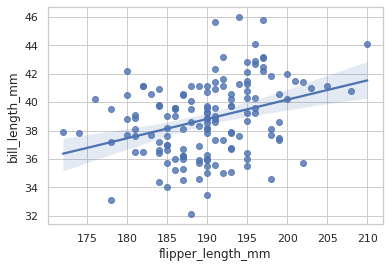

In [ ]:
sns.regplot(x="flipper_length_mm", y='bill_length_mm', data=adelie)
plt.show()

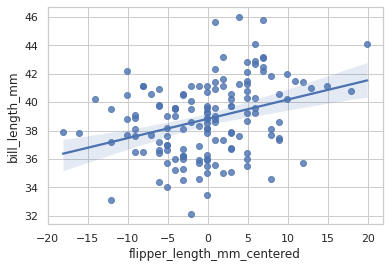

In [ ]:
sns.regplot(x="flipper_length_mm_centered", y='bill_length_mm', data=adelie)
plt.show()

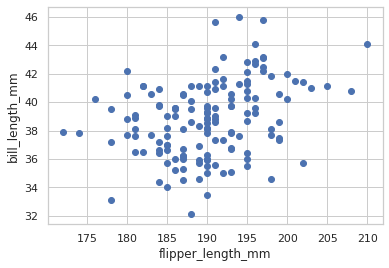

In [ ]:
plt.scatter(adelie["flipper_length_mm"], adelie["bill_length_mm"])
plt.xlabel("flipper_length_mm")
plt.ylabel("bill_length_mm")
plt.show()

In [ ]:
adelie["flipper_length_mm"].mean()

190.1027397260274

In [ ]:
adelie["body_mass_g_centered"] = adelie["body_mass_g"] - adelie["body_mass_g"].mean()
reg2 = smf.ols('bill_length_mm ~ flipper_length_mm_centered + body_mass_g_centered', data = adelie).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         bill_length_mm   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     31.27
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           5.44e-12
Time:                        20:01:32   Log-Likelihood:                -323.16
No. Observations:                 146   AIC:                             652.3
Df Residuals:                     143   BIC:                             661.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
rse = np.sqrt(reg2.mse_resid)
rmse = rse*np.sqrt((adelie.shape[0]-2)/adelie.shape[0])
print(rse)
print(rmse)

2.236389606292046
2.2210190488517143
